In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
# Read the dataset 
data = pd.read_csv('Abalone_data.csv')

In [3]:
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)

In [4]:
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

This dataset has 4176 observations with 9 features.


In [5]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'age'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   int64  
 2   Diameter        4176 non-null   int64  
 3   Height          4176 non-null   int64  
 4   Whole_weight    4176 non-null   float64
 5   Shucked_weight  4176 non-null   float64
 6   Viscera_weight  4176 non-null   float64
 7   Shell_weight    4176 non-null   float64
 8   age             4176 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 293.8+ KB


In [7]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,104.801724,81.578305,27.905412,165.763506,71.879957,36.122534,47.770426,11.432471
std,24.020509,19.849906,8.365278,98.084710,44.395943,21.924091,27.842510,3.223601
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,2.500000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.675000,26.000000,9.500000
50%,109.000000,85.000000,28.000000,159.950000,67.200000,34.200000,46.800000,10.500000
75%,123.000000,96.000000,33.000000,230.650000,100.400000,50.600000,65.800000,12.500000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,30.500000


In [8]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

In [9]:
categorical_features

Index(['Sex'], dtype='object')

In [10]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.128117
7,age,1.114756
4,Shucked_weight,0.718466
6,Shell_weight,0.620324
5,Viscera_weight,0.591251
3,Whole_weight,0.530385
1,Diameter,-0.609238
0,Length,-0.640010


In [11]:
# Missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
age,0,0.0
Shell_weight,0,0.0
Viscera_weight,0,0.0
Shucked_weight,0,0.0
Whole_weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


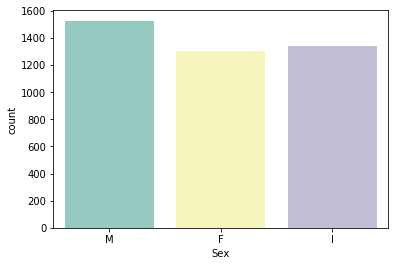

In [12]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

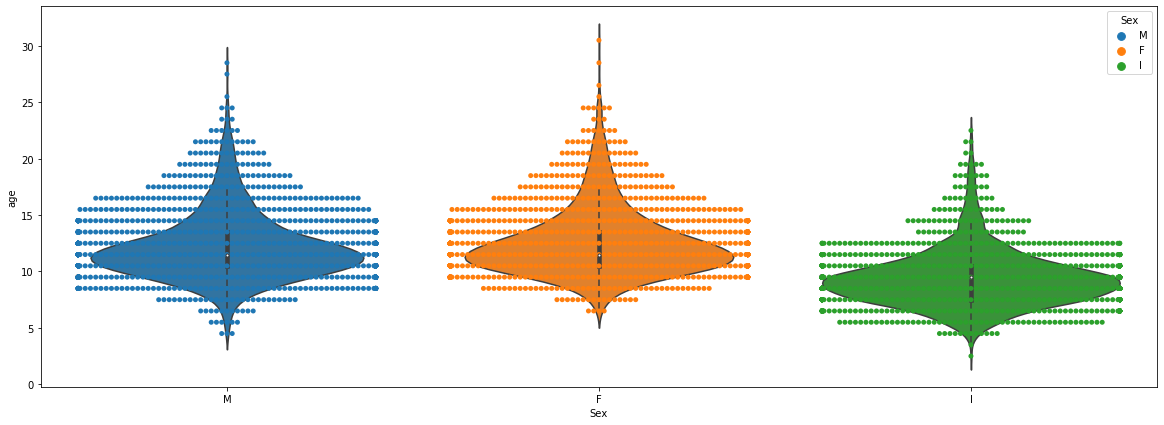

In [13]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = data)

In [14]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age
Sex,,,,,,,,
I,85.549180,65.298808,21.599106,86.272504,38.207004,18.402012,25.636438,9.390462
M,112.292076,87.867060,30.283563,198.354420,86.616503,43.123903,56.411133,12.202685
F,115.818669,90.946442,31.602142,209.306427,89.237567,46.137720,60.401989,12.629304


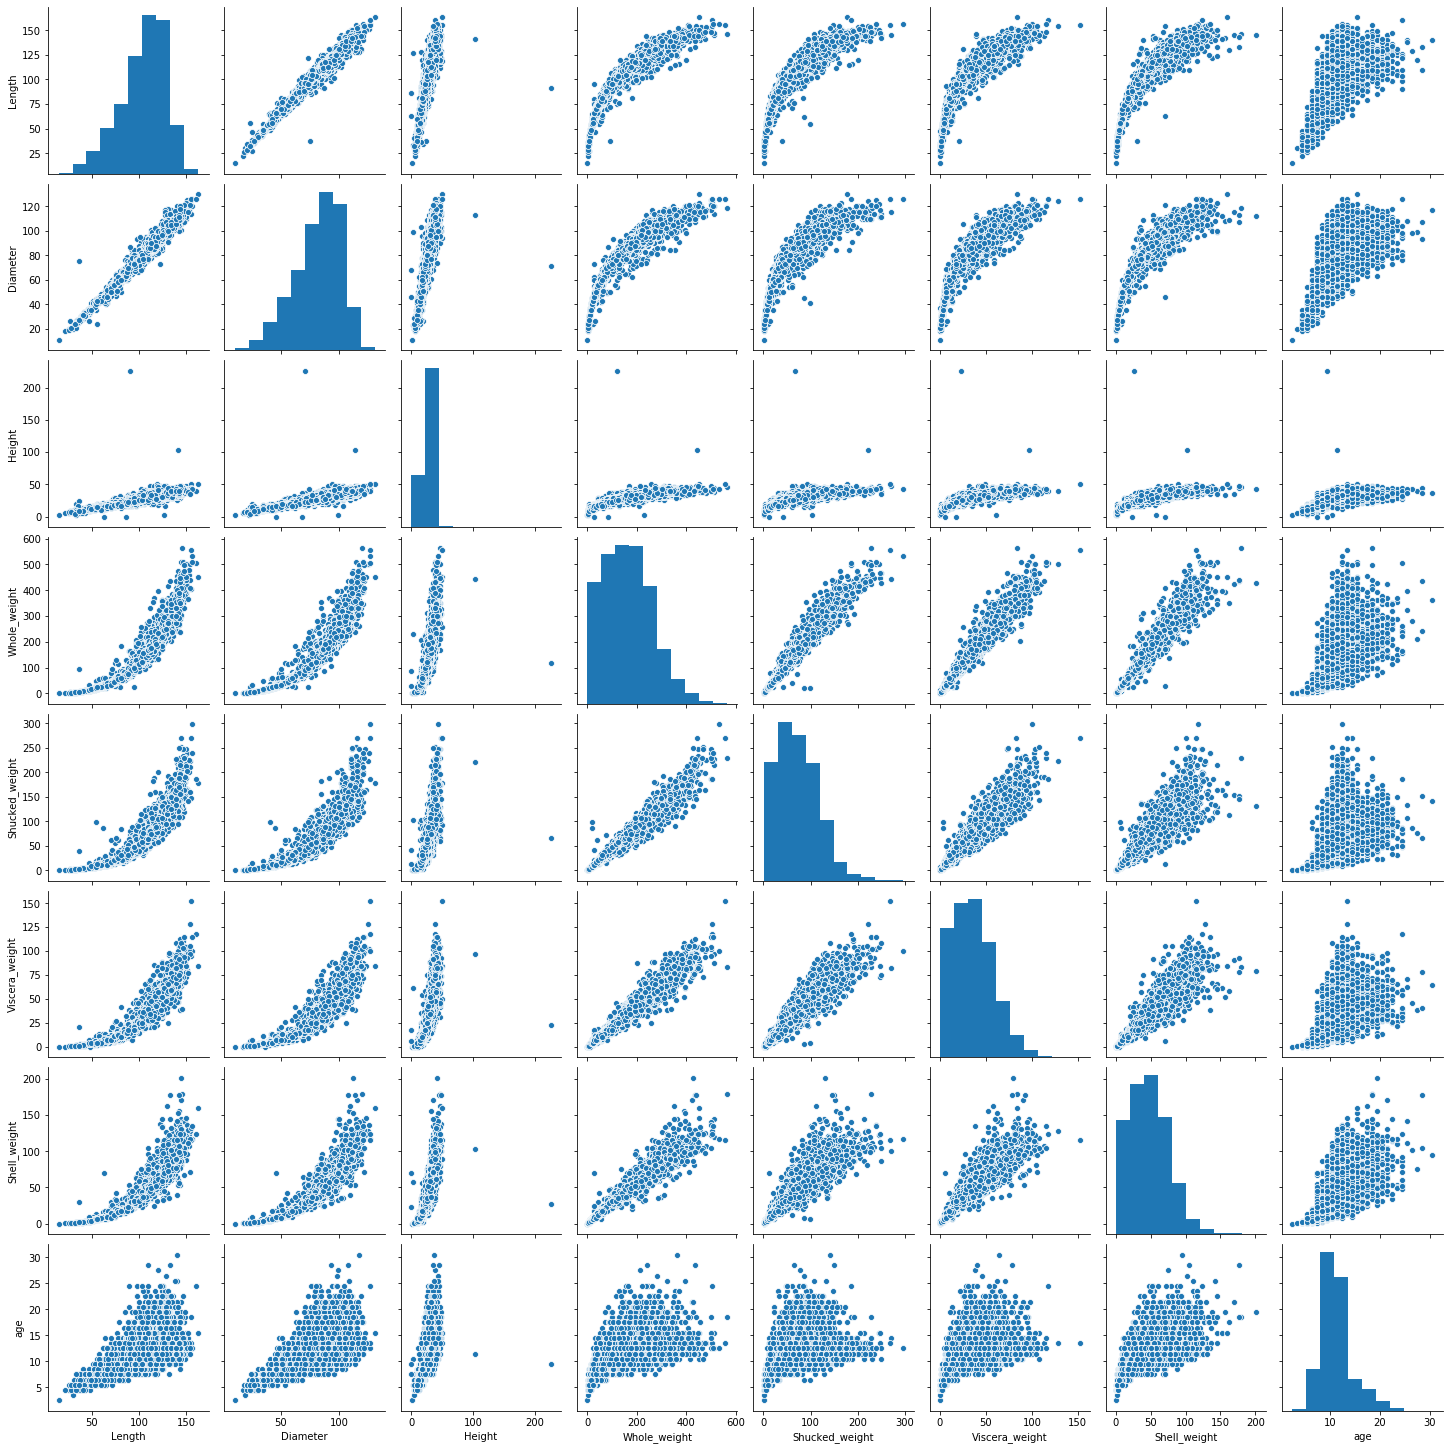

In [15]:
sns.pairplot(data[numerical_features])

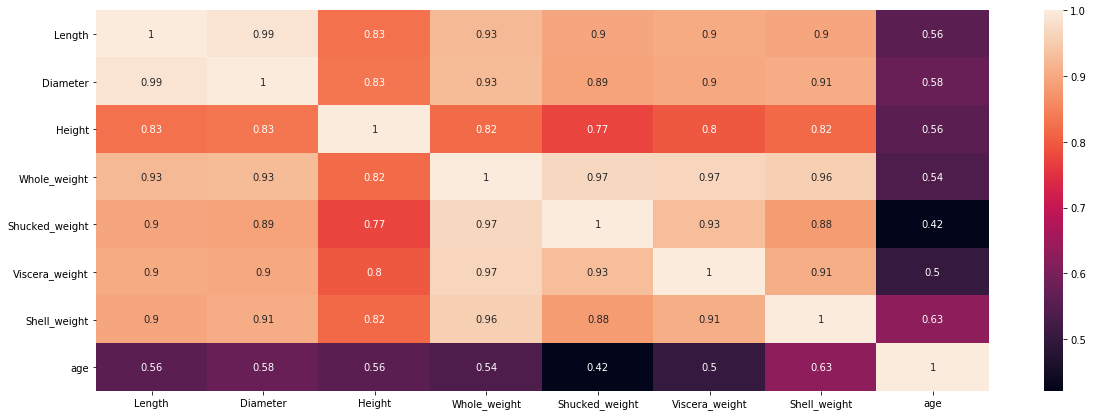

In [16]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

In [17]:
data = pd.get_dummies(data)
dummy_data = data.copy()

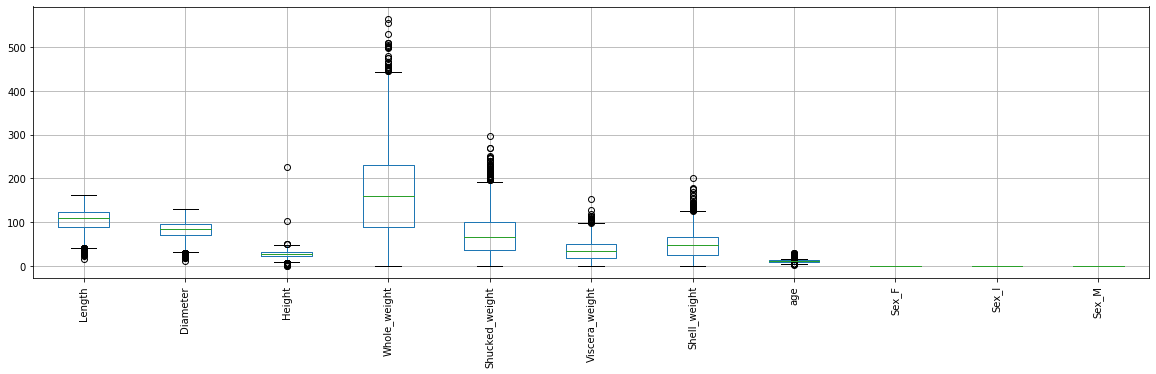

In [18]:
data.boxplot( rot = 90, figsize=(20,5))

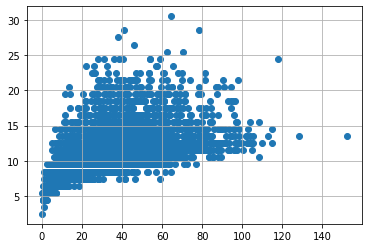

In [19]:
var = 'Viscera_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [20]:
# outliers removal
data.drop(data[(data['Viscera_weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera_weight']<0.5) & (data['age'] > 25)].index, inplace=True)

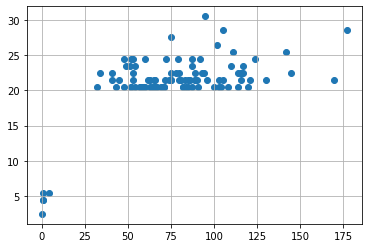

In [21]:
var = 'Shell_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [22]:
data.drop(data[(data['Shell_weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell_weight']<0.8) & (data['age'] > 25)].index, inplace=True)

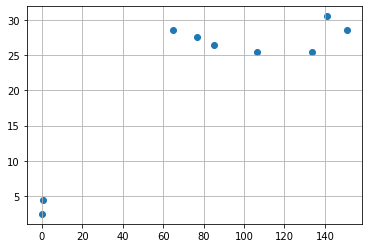

In [23]:
var = 'Shucked_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [24]:
data.drop(data[(data['Shucked_weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked_weight']<1) & (data['age'] > 20)].index, inplace=True)

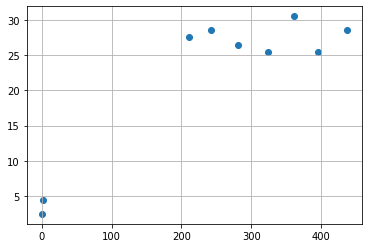

In [25]:
var = 'Whole_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [26]:
data.drop(data[(data['Whole_weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole_weight']<2.5) & (data['age'] > 25)].index, inplace=True)

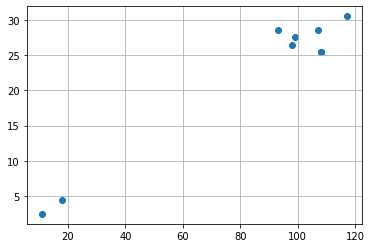

In [27]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [28]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

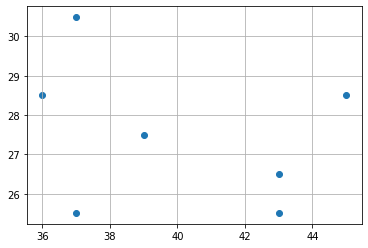

In [29]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [30]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

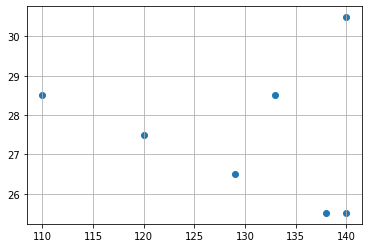

In [31]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [32]:
data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

In [33]:
X = data.drop('age', axis = 1)
y = data['age']

In [34]:
from sklearn.preprocessing import  StandardScaler
from sklearn.feature_selection import SelectKBest

In [35]:
#feature Scaling
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

C:\Users\Homemillenium\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [8] are constant.
  UserWarning)
C:\Users\Homemillenium\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Homemillenium\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [8] are constant.
  UserWarning)
C:\Users\Homemillenium\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [36]:
from sklearn.model_selection import  train_test_split, cross_val_score

In [37]:
# Spliting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
y_test_pred

array([24.51831238, 28.44454817])

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)


Mean Squared error of training set :0.000000
Mean Squared error of testing set :12.262100


In [42]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:1.00
R2 Score of testing set:-4.45


In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

-4.449822278931995

In [44]:
lm.predict([[23455,34167,98667,34679,34578,23568,54217,25293,98632,98456]])

array([-23570.97771737])